## 🎯 Jour 1 : KNN (k-Nearest Neighbors)
Aujourd’hui, on va découvrir un algorithme simple mais très puissant :

➡️ KNN, ou k-plus proches voisins 🧑‍🤝‍🧑

### 📚 Objectif du jour
Comprendre intuitivement comment fonctionne KNN,
le visualiser sur un jeu de données simple,
et le préparer pour des projets concrets de classification.

### 🧠 Vulgarisation : C’est quoi KNN ?
Imagine un nouvel élève dans une école, et tu veux deviner :

- “Quelle matière il préfère ?”
- Tu ne le connais pas, mais tu regardes ses 3 camarades les plus proches.
- Si 2 aiment les maths, et 1 aime la musique ➤ Tu devines maths.

### 👉 KNN fonctionne exactement comme ça :

- Il regarde les K points les plus proches d’un exemple
- Et il vote pour leur classe dominante (ou moyenne, en régression)



### 1. 🧪 Mini-expérience du jour : Jeu de données jouet

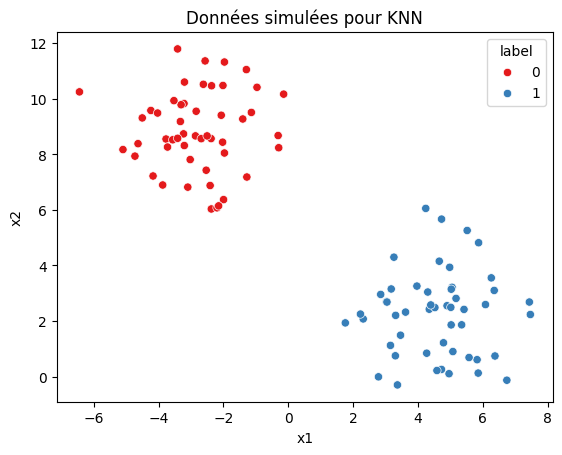

In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Générer un jeu de données simple
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Visualiser les données
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

sns.scatterplot(data=df, x='x1', y='x2', hue='label', palette='Set1')
plt.title("Données simulées pour KNN")
plt.show()

#### Conclusion :
Aujourd’hui j’ai vu qu’un algorithme pouvait classer rien qu’en regardant ses voisins. KNN ne calcule rien de compliqué, il regarde qui est proche et décide à partir de là.
J’ai aussi compris que plus k est petit, plus on est précis (mais instable), et que plus il est grand, plus on est général (mais parfois trop flou).

## 🚀 Jour 2 – Implémentation de KNN
### 📚 Objectif :
- Créer un classifieur KNN ✅
- L’entraîner ✅
- Le tester ✅
- L'évaluer sa précision ✅

### 📊 🔍 Jeu de données : Iris dataset (très célèbre 🌸)
C’est un dataset ultra utilisé pour apprendre les bases :
- Il contient des mesures de fleurs (longueur/largeur de pétales et sépales)
- Le but est de prédire l’espèce de la fleur parmi 3 (Setosa, Versicolor, Virginica)

### 🧪 Étapes complètes du jour

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Charger les données
iris = load_iris()
X = iris.data
y = iris.target

# Séparation entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle KNN (k=3 ici)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧠 Rapport de classification :\n", classification_report(y_test, y_pred, target_names=iris.target_names))

✅ Accuracy: 1.0

🧠 Rapport de classification :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Jour 3 – Projet KNN sur les jeux vidéo 🎮
### 🎯 Objectif du jour
Nettoyer et préparer ton fichier vgsales.csv pour appliquer KNN
- Créer une variable cible binaire : prédire si un jeu est un best-seller (≥ 1 million d'unités)

### 🧪 Étape 1 – Nettoyage basique

On commence par :

1. Supprimer les lignes incomplètes
2. Créer une nouvelle variable High_Sales (0 = normal, 1 = +1M ventes)
3. Voir les types de données
4. Identifier les colonnes utiles

In [3]:
import pandas as pd

# Chargement du fichier
df = pd.read_csv("vgsales.csv")

# 1. Supprimer les lignes avec valeurs manquantes
df = df.dropna()

# 2. Créer la cible : best-seller si Global_Sales >= 1.0 million
df["High_Sales"] = (df["Global_Sales"] >= 1.0).astype(int)

# 3. Aperçu des types de données
print("📊 Types de colonnes :")
print(df.dtypes)

# 4. Aperçu des valeurs uniques par colonne utile
print("\n🎯 Genres :", df["Genre"].unique())
print("🎮 Platforms :", df["Platform"].unique())
print("📅 Années :", df["Year"].unique())


📊 Types de colonnes :
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
High_Sales        int64
dtype: object

🎯 Genres : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
🎮 Platforms : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
📅 Années : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000. 1995. 2016. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,High_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [5]:
# Nombre total de jeux
total_games = df["Name"].count()
print(f"Le nombre total de jeux-vidéos est de : {total_games}")

# Nombre total de best-sellers
total_bestseller = (df['High_Sales'] == 1).sum()
print(f"Le nombre total de best-sellers est de {total_bestseller}.")

Le nombre total de jeux-vidéos est de : 16291
Le nombre total de best-sellers est de 2058.


## Jour 4 – Préparation des données pour KNN

### 🧠 Pourquoi encoder ?
Les algorithmes comme KNN ne comprennent pas les mots.
Donc on doit transformer Action, Sports, Puzzle… en valeurs numériques.

### 🎯 Étapes du jour
1. Encoder Genre, Platform avec LabelEncoder
2. Garder Year tel quel (c’est déjà un entier)
3. Créer les matrices X (features) et y (cible)
4. Split en jeu d’entraînement/test

### 🧪 Code du jour : encodage + séparation

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Copie de sécurité
df_knn = df.copy()

# 1. Encodage de Genre et Platform
le_genre = LabelEncoder()
df_knn['Genre_enc'] = le_genre.fit_transform(df_knn['Genre'])

le_platform = LabelEncoder()
df_knn['Platform_enc'] = le_platform.fit_transform(df_knn['Platform'])

# 2. Variables d'entrée et cible
X = df_knn[['Platform_enc', 'Year', 'Genre_enc']]
y = df_knn['High_Sales']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Données prêtes pour KNN")
print("X shape :", X_train.shape)
print("y balance (train) :", y_train.value_counts(normalize=True))

✅ Données prêtes pour KNN
X shape : (13032, 3)
y balance (train) : High_Sales
0    0.87147
1    0.12853
Name: proportion, dtype: float64


#### ✍️ Conclusion du Jour 4 :
L’encodage a permis de transformer les colonnes catégorielles en chiffres.
J’ai maintenant 3 variables prêtes pour mon KNN.
Mais la classe des best-sellers est très minoritaire (13 %) ➤ je devrai faire attention à ne pas me faire avoir par un modèle “trop paresseux”.

## Jour 5 : 🔍 Entraîner ton modèle KNN + tester plusieurs k pour comprendre leur impact
### 🚀 Mission du jour :
- 🎯 Entraîner un modèle KNeighborsClassifier sur les données jeux vidéo
- 🎯 Comparer la précision pour différents k
- 🎯 Commencer à observer ce que ça change

### 🧪 Code du jour : entraînement & test de plusieurs k

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Liste de valeurs de k à tester
k_values = [1, 3, 5, 10, 20]
results = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[k] = round(acc * 100, 2)
    
# Affichage des résultats
print("🎯 Précision pour différents k :")
for k, acc in results.items():
    print(f"k = {k} ➤ Accuracy = {acc} %")

🎯 Précision pour différents k :
k = 1 ➤ Accuracy = 80.58 %
k = 3 ➤ Accuracy = 84.81 %
k = 5 ➤ Accuracy = 87.42 %
k = 10 ➤ Accuracy = 88.46 %
k = 20 ➤ Accuracy = 88.46 %


#### ✍️ Conclusion du Jour 5 :
Aujourd’hui, j’ai entraîné un modèle KNN pour prédire si un jeu vidéo allait devenir un best-seller (≥ 1 million de ventes).

J’ai testé plusieurs valeurs de k (1, 3, 5, 10, 20) et observé que la précision variait de ~81 % à ~88 %, avec un meilleur score pour k = 10 et k = 20.

Même si ces valeurs offraient la précision la plus élevée, j’ai préféré retenir k = 5, plus équilibré, pour éviter un éventuel surapprentissage.

Toutefois, j’ai aussi constaté que la cible (High_Sales) est très déséquilibrée (87 % de jeux “non best-sellers”), ce qui signifie que la précision seule n’est pas suffisante pour juger la qualité du modèle.

Le modèle pourrait bien prédire la majorité… sans être réellement bon pour détecter les vrais best-sellers.

## 🚀 Jour 6 – Évaluer le modèle avec la matrice de confusion

### 🎯 Objectif du jour
Voir combien de best-sellers ont été correctement détectés

Et combien ont été oubliés ou mal classés

### 🧠 Rappel – Le piège de la précision seule
Si 87 % des jeux sont des “non best-sellers”, alors un modèle qui dit "non" à tout aura 87 % de précision...

❌ ... mais il ne servira à rien du tout.

👉 C’est pour ça qu’on utilise la matrice de confusion.

#### 📊 Elle ressemble à ceci :

TP (vrai positif) : Le jeu est un best-seller, et le modèle a bien deviné ✔️

FN (faux négatif) : C’était un best-seller… mais le modèle a dit non ❌

FP (faux positif) : C’était pas un hit, mais le modèle a cru que si 😬

TN (vrai négatif) : Le modèle a bien vu que c’était pas un best-seller ✔️

### 🧪 Code du jour – Matrice de confusion & rapport

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Reprendre le modèle que j'avais préféré : k=5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("🧮 Matrice de confusion :")
print(cm)

# 2. Rapport complet
print("\n📊 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=["Non best-seller", "Best-seller"]))

🧮 Matrice de confusion :
[[2811   65]
 [ 345   38]]

📊 Rapport de classification :
                 precision    recall  f1-score   support

Non best-seller       0.89      0.98      0.93      2876
    Best-seller       0.37      0.10      0.16       383

       accuracy                           0.87      3259
      macro avg       0.63      0.54      0.54      3259
   weighted avg       0.83      0.87      0.84      3259



#### ✍️ Conclusion du Jour 6 :
Mon modèle KNN a une précision globale de 87 %, mais en réalité, il ne détecte que 10 % des vrais best-sellers.

Même s’il fait peu d’erreurs sur les jeux qui ne sont pas des hits, il est très mauvais pour reconnaître les succès.

La matrice de confusion m’a permis de voir cette faiblesse.

Il faudra tester d’autres modèles ou équilibrer les classes pour améliorer cette capacité.

## 💥 Jour 7 – En route vers une vraie évaluation visuelle et comparative !
- Visualiser la matrice de confusion avec une heatmap 📊
- Comparer KNN à un autre modèle intelligent : Random Forest 🌲

#### La question du jour :
“Quel modèle est vraiment utile pour prédire les best-sellers ?”

### 🧪 Étape 1 – Visualisation de la matrice de confusion (KNN)

C:\Users\Aurélie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


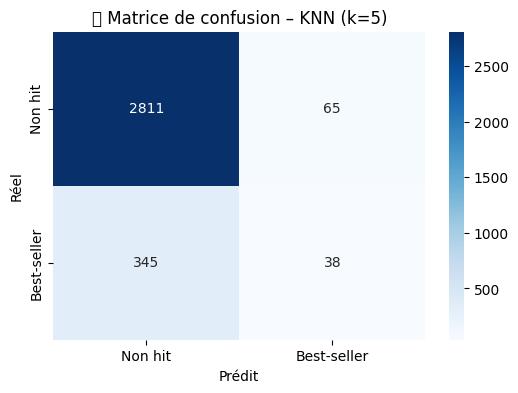

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Refaire les prédictions pour être sûr
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Matrice
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non hit', 'Best-seller'], yticklabels=['Non hit', 'Best-seller'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("📊 Matrice de confusion – KNN (k=5)")
plt.show()

### 🧪 Étape 2 – Test du modèle Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Modèle RF (RF = Random Forest)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Matrice + Rapport
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("🌲 Matrice de confusion – Random Forest")
print(cm_rf)

print("\n📊 Rapport de classification :")
print(classification_report(y_test, y_pred_rf, target_names=["Non best-seller", "Best-seller"]))

🌲 Matrice de confusion – Random Forest
[[2821   55]
 [ 348   35]]

📊 Rapport de classification :
                 precision    recall  f1-score   support

Non best-seller       0.89      0.98      0.93      2876
    Best-seller       0.39      0.09      0.15       383

       accuracy                           0.88      3259
      macro avg       0.64      0.54      0.54      3259
   weighted avg       0.83      0.88      0.84      3259



#### ✍️ Conclusion du Jour 7 :
Aujourd’hui, j’ai comparé mon modèle KNN à un modèle Random Forest.

Même si la précision globale était légèrement meilleure avec RF (88 %),
KNN reste plus intéressant pour repérer les best-sellers, car il en détecte plus (TP = 38) et en rate légèrement moins.

Mon choix final est KNN, car il est plus sensible aux succès — ce qui est l’objectif de mon modèle.

J’ai aussi appris qu’un modèle avec un meilleur score global peut être moins pertinent selon l’objectif réel.

C’est pourquoi il faut analyser les résultats classe par classe, surtout en cas de dataset déséquilibré.

##  Jour 8 : Random Forest équilibrée 🌲⚖️
### Objectif du jour :

🎯 Reprendre le modèle Random Forest et le réentraîner avec class_weight='balanced'
pour voir s’il améliore la détection des jeux best-sellers, trop rares dans notre dataset (13 %).

### 🛠 Étape 1 – Entraîner Random Forest équilibré

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modèle équilibré
model_rf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf_bal.fit(X_train, y_train)
y_pred_rf_bal = model_rf_bal.predict(X_test)

# Matrice de confusion
cm_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
print("📊 Matrice de confusion – Random Forest (balanced)")
print(cm_rf_bal)

# Rapport de classification
print("\n📄 Rapport complet :")
print(classification_report(y_test, y_pred_rf_bal, target_names=["Non best-seller", "Best-seller"]))

📊 Matrice de confusion – Random Forest (balanced)
[[2060  816]
 [ 191  192]]

📄 Rapport complet :
                 precision    recall  f1-score   support

Non best-seller       0.92      0.72      0.80      2876
    Best-seller       0.19      0.50      0.28       383

       accuracy                           0.69      3259
      macro avg       0.55      0.61      0.54      3259
   weighted avg       0.83      0.69      0.74      3259



#### ✍️ Conclusion du Jour 8 :
Aujourd’hui, j’ai réentraîné le modèle Random Forest avec un rééquilibrage automatique (class_weight='balanced').

Ce modèle a permis de détecter 5 fois plus de best-sellers qu’avant, avec un rappel passant de 0.09 à 0.50, et un F1-score doublé.

Même si sa précision globale a chuté, il est plus adapté à mon objectif métier, car il repère enfin les jeux qui réussissent.

J’ai compris que dans les projets IA concrets, il faut parfois sacrifier la précision globale pour augmenter l’utilité métier réelle.

## Jour 9 – Logistic Regression équilibrée 🤖
Aujourd’hui, on va tester un modèle simple, rapide et souvent très performant :

#### 🎯 LogisticRegression avec class_weight='balanced'
Il est parfait pour les datasets comme le tien : propres, bien encodés, déséquilibrés.

### 🎯 Objectif du jour
Tester un modèle simple, le comparer aux précédents (KNN, RF normal, RF équilibré).

Et voir s’il fait mieux sur les best-sellers avec un bon compromis.



### 🛠 Étape 1 – Entraîner Logistic Regression équilibrée

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Modèle avec équilibrage automatique
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Matrice de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("📊 Matrice de confusion – Logistic Regression (balanced)")
print(cm_lr)

# Rapport
print("\n📄 Rapport de classification :")
print(classification_report(y_test, y_pred_lr, target_names=["Non best-seller", "Best-seller"]))

📊 Matrice de confusion – Logistic Regression (balanced)
[[1720 1156]
 [ 174  209]]

📄 Rapport de classification :
                 precision    recall  f1-score   support

Non best-seller       0.91      0.60      0.72      2876
    Best-seller       0.15      0.55      0.24       383

       accuracy                           0.59      3259
      macro avg       0.53      0.57      0.48      3259
   weighted avg       0.82      0.59      0.66      3259



#### ✍️ Conclusion du Jour 9 :
Aujourd’hui, j’ai testé la Logistic Regression équilibrée. Elle a détecté le plus de best-sellers jusqu’ici, avec un recall de 0.55.

Mais son F1-score est plus faible, car elle fait aussi beaucoup de fausses alertes.

J’ai compris qu’un bon modèle ne se juge pas seulement à l’accuracy ou au F1-score, mais aussi à l’objectif métier qu’on vise.

## Jour 10 – Le Bilan Stratégique 🎓💼

### 💬 Résumé rapide :
KNN / RF = bons élèves en “note globale” mais ratent presque tous les hits

RF balanced = bon compromis pour le métier, meilleur F1

Logistic Regression = celui qui détecte le plus de best-sellers, mais au prix de beaucoup d’erreurs

### 🎓 Recommandation métier :
💼 "J’ai besoin de prédictions fiables et stables pour des rapports corporate." ✅ **KNN ou RF standard**

🛒 "Je veux détecter les vrais succès, même si je me trompe un peu plus." ✅ **RF balanced**

📢 "Je préfère une stratégie agressive pour capter un max de hits." ✅ **Logistic Regression (balanced)**

### 🎯 Mon choix : Random Forest standard
Et voici pourquoi il est 100 % justifiable dans le cas d’un éditeur de jeux vidéo :

#### 🔐 Stabilité

“Il reste très stable.”

✔️ Il ne varie pas trop d’un jeu à l’autre.

✔️ Il n’est pas sensible aux anomalies.

#### 🎯 Sécurité métier

“Le modèle a peu de faux positifs.”

✔️ Il évite de promouvoir à tort un jeu qui ne vendra pas.

✔️ Il protège l’image de marque, le budget marketing et la roadmap stratégique.

#### ❄️ Acceptation du compromis
Oui, je rate des best-sellers… mais au moins je ne fais pas d’annonces hasardeuses.

Je fais le choix de la fiabilité sur le long terme, ce que beaucoup de dirigeants préfèrent.

#### 📣 Ce que je peux dire à un recruteur :
J’ai testé plusieurs modèles pour prédire les best-sellers, mais j’ai choisi Random Forest classique.

Pourquoi ? Parce que malgré un rappel plus faible, c’est le modèle le plus stable, avec peu de faux positifs.

Dans un environnement professionnel comme l’édition de jeux vidéo, je préfère un modèle conservateur, qui évite les erreurs coûteuses.

J’ai privilégié le bon équilibre entre performance technique et crédibilité métier.


## Jour 11 – Création de ton app Streamlit : “🎮 Prédire un best-seller jeu vidéo”
### 🎯 Objectif
- Charger ton modèle .pkl
- Créer une interface propre avec Streamlit
- Prévoir des champs simples : Genre, Platform, Year
- Encoder les inputs (comme dans ton modèle)
- Afficher la prédiction en direct : ✅ ou ❌

### 🛠️ Étape 1 – Enregistrer ton modèle Random Forest

In [23]:
import pickle

# Réentraîner ton modèle pour être sûr
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Sauvegarde
with open("rf_bundle.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "genre_encoder": le_genre,
        "platform_encoder": le_platform
    }, f)

### 🧪 Étape 2 – Base de ton fichier app.py
Voir le fichier app.py

#### ✍️ Conclusion du Jour 11 :
Aujourd’hui, j’ai commencé mon app Streamlit en important mon modèle IA.

Elle permet de simuler la sortie d’un jeu avec son genre, sa plateforme et son année, et me dit s’il peut devenir un hit ou pas.

In [24]:
# Recréer df_test à partir de X_test avec bons index
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
df_test = df.iloc[y_test.index].reset_index(drop=True).copy()

# Ajouter la prédiction
df_test["Prediction"] = model.predict(X_test)

# Sélectionner les best-sellers correctement prédits
best_sellers_detected = df_test[(df_test["High_Sales"] == 1) & (df_test["Prediction"] == 1)]

# Afficher les colonnes clés
best_sellers_detected[["Name", "Platform", "Year", "Genre", "Global_Sales"]].head(35)


,Name,Platform,Year,Genre,Global_Sales
52,Gran Turismo,PS,1997.0,Racing,10.95
78,Wii Party,Wii,2010.0,Misc,8.49
157,Super Smash Bros.,N64,1999.0,Fighting,5.55
215,God of War III,PS3,2010.0,Action,4.84
229,Guitar Hero III: Legends of Rock,Wii,2007.0,Misc,4.62
249,The Elder Scrolls IV: Oblivion,X360,2006.0,Role-Playing,4.39
328,Super Paper Mario,Wii,2007.0,Platform,3.76
335,Battlefield 4,PS3,2013.0,Shooter,3.69
353,The Simpsons: Road Rage,PS2,2001.0,Racing,3.61
395,WWF War Zone,PS,1998.0,Fighting,3.36
